# Spatial TransFormer Network

In [1]:
import tensorflow as tf
from spatial_transformer import transformer
import numpy as np
from tf_utils import weight_variable, bias_variable, dense_to_one_hot

# %% Load data
mnist_cluttered = np.load('./data/mnist_sequence1_sample_5distortions5x5.npz')

X_train = mnist_cluttered['X_train']
y_train = mnist_cluttered['y_train']
X_valid = mnist_cluttered['X_valid']
y_valid = mnist_cluttered['y_valid']
X_test = mnist_cluttered['X_test']
y_test = mnist_cluttered['y_test']

In [2]:
print X_train.shape
print y_train.shape
print X_valid.shape
print X_test.shape

(10000, 1600)
(10000, 1)
(1000, 1600)
(1000, 1600)


# [sec0] Give a clutter plot


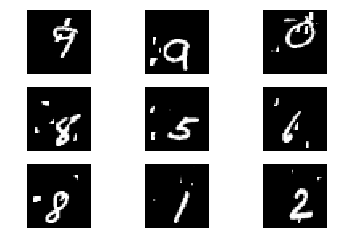

the image is more with noise


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(3):
    for j in range(3):
        plt_idx = i * 3 + j + 1
        plt.subplot(3, 3, plt_idx)
        first_train_img = np.reshape(X_train[i*3+j, :], (40, 40))
        plt.imshow(first_train_img, cmap = plt.get_cmap('gray'))
        plt.axis('off')

plt.show()
print "the image is more with noise"

# [sec0-1] create rotation image set

In [4]:
import cv2

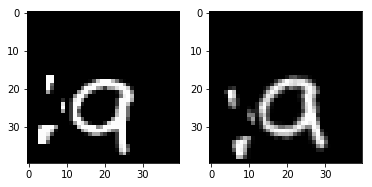

In [5]:
first_train_img = np.reshape(X_train[1, :], (40, 40))
plt.subplot(1, 2, 1)
plt.imshow(first_train_img, cmap = plt.get_cmap('gray'))
#M = np.float32([[1,0,0],[0,1,0]])
rows,cols = first_train_img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),15,1)
dst = cv2.warpAffine(first_train_img,M,(cols,rows))

plt.subplot(1, 2, 2)
plt.imshow(dst, cmap = plt.get_cmap('gray'))


In [6]:
# make it as function
def getrotation_img(image,angel):
    image = np.reshape(image, (40, 40))
    rows,cols = image.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angel,1)
    dst = cv2.warpAffine(image,M,(cols,rows))
    return dst


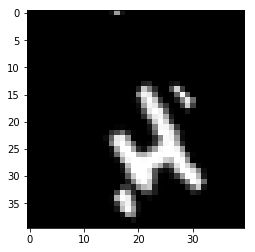

In [7]:
# take a check
dst=getrotation_img(X_train[50, :],50)
plt.imshow(dst, cmap = plt.get_cmap('gray'))

## let's begin rotation!!

In [8]:
import random 
def rotation_all(X_train,angle):
    for i in xrange(X_train.shape[0]):
        angle+=random.randint(-20 ,20)
        if i==0:
            X_train_temp=np.reshape(getrotation_img(X_train[i, :],angle), (-1, 1600))
        else:
            temp=np.reshape(getrotation_img(X_train[i, :],angle), (-1, 1600))
            X_train_temp=np.concatenate((X_train_temp, temp), axis=0)
    print "the rotation output : "+str(X_train_temp.shape)
    return X_train_temp

In [9]:
# training set
X_train_0=rotation_all(X_train,0)
X_train_0_1=rotation_all(X_train,0)
X_train_45=rotation_all(X_train,45)
X_train_90=rotation_all(X_train,90)
X_train_135=rotation_all(X_train,135)
X_train_180=rotation_all(X_train,180)
X_train_225=rotation_all(X_train,225)
X_train_270=rotation_all(X_train,270)
X_train_315=rotation_all(X_train,315)
X_train=np.concatenate((X_train,X_train_0,X_train_0_1,X_train_45,X_train_90,\
                       X_train_135,X_train_180,X_train_225,\
                       X_train_270,X_train_315),axis=0)
print X_train.shape

y_train=np.concatenate((y_train,y_train,y_train,y_train,y_train,y_train,\
                        y_train,y_train,y_train,y_train),axis=0)
print y_train.shape

the rotation output : (10000, 1600)
the rotation output : (10000, 1600)
the rotation output : (10000, 1600)
the rotation output : (10000, 1600)
the rotation output : (10000, 1600)
the rotation output : (10000, 1600)
the rotation output : (10000, 1600)
the rotation output : (10000, 1600)
the rotation output : (10000, 1600)
(100000, 1600)
(100000, 1)


In [10]:
# validation set
X_valid_0=rotation_all(X_valid,0)
X_valid_0_1=rotation_all(X_valid,0)
X_valid_45=rotation_all(X_valid,45)
X_valid_90=rotation_all(X_valid,90)
X_valid_135=rotation_all(X_valid,135)
X_valid_180=rotation_all(X_valid,180)
X_valid_225=rotation_all(X_valid,225)
X_valid_270=rotation_all(X_valid,270)
X_valid_315=rotation_all(X_valid,315)
X_valid=np.concatenate((X_valid,X_valid_0,X_valid_0_1,X_valid_45,X_valid_90,\
                       X_valid_135,X_valid_180,X_valid_225,\
                       X_valid_270,X_valid_315),axis=0)
print X_valid.shape
y_valid=np.concatenate((y_valid,y_valid,y_valid,y_valid,y_valid,y_valid,\
                        y_valid,y_valid,y_valid,y_valid),axis=0)
print y_valid.shape

the rotation output : (1000, 1600)
the rotation output : (1000, 1600)
the rotation output : (1000, 1600)
the rotation output : (1000, 1600)
the rotation output : (1000, 1600)
the rotation output : (1000, 1600)
the rotation output : (1000, 1600)
the rotation output : (1000, 1600)
the rotation output : (1000, 1600)
(10000, 1600)
(10000, 1)


[9][9]
[1][1]
[6][6]
[0][0]


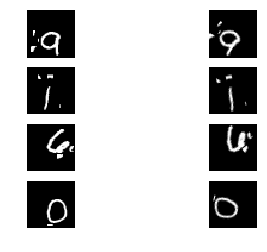

In [11]:
# take a look of image
## training set~~~~~~~
first_train_img = np.reshape(X_train[1, :], (40, 40))
plt.subplot(4, 2, 1)
plt.imshow(first_train_img, cmap = plt.get_cmap('gray'))
dst = np.reshape(X_train[10001, :], (40, 40))
plt.axis('off')

plt.subplot(4, 2, 2)
plt.imshow(dst, cmap = plt.get_cmap('gray'))
plt.axis('off')

print str(y_train[10001])+str( y_train[1])

first_train_img = np.reshape(X_train[5000, :], (40, 40))
plt.subplot(4, 2, 3)
plt.imshow(first_train_img, cmap = plt.get_cmap('gray'))
dst = np.reshape(X_train[15000, :], (40, 40))
plt.axis('off')

plt.subplot(4, 2, 4)
plt.imshow(dst, cmap = plt.get_cmap('gray'))
plt.axis('off')
print str(y_train[15000])+str( y_train[5000])

## validation set~~~~

first_train_img = np.reshape(X_valid[500, :], (40, 40))
plt.subplot(4, 2, 5)
plt.imshow(first_train_img, cmap = plt.get_cmap('gray'))
dst = np.reshape(X_valid[1500, :], (40, 40))
plt.axis('off')

plt.subplot(4, 2, 6)
plt.imshow(dst, cmap = plt.get_cmap('gray'))
plt.axis('off')
print str(y_valid[1500])+str( y_valid[500])


first_train_img = np.reshape(X_valid[700, :], (40, 40))
plt.subplot(4, 2, 7)
plt.imshow(first_train_img, cmap = plt.get_cmap('gray'))
dst = np.reshape(X_valid[1700, :], (40, 40))
plt.axis('off')

plt.subplot(4, 2, 8)
plt.imshow(dst, cmap = plt.get_cmap('gray'))
plt.axis('off')
print str(y_valid[1700])+str( y_valid[700])

In [12]:
# before training , shuffle it
arr = np.arange(X_train.shape[0])
np.random.shuffle(arr)
X_train=X_train[arr]
y_train=y_train[arr]

# sec[0-3] FCN without STN :  accuracy~30%

In [48]:
# clean graph
tf.reset_default_graph()

In [49]:
# % turn from dense to one hot representation
Y_train = dense_to_one_hot(y_train, n_classes=10)
Y_valid = dense_to_one_hot(y_valid, n_classes=10)
Y_test = dense_to_one_hot(y_test, n_classes=10)


# %% We can add dropout for regularizing and to reduce overfitting like so:
keep_prob = tf.placeholder(tf.float32)
regular_lambda = tf.placeholder(tf.float32)
learning_rate = tf.placeholder(tf.float32)


# %% Graph representation of our network

# %% Placeholders for 40x40 resolution
x = tf.placeholder(tf.float32, [None, 1600])
y = tf.placeholder(tf.float32, [None, 10])


W_FCN = weight_variable([1600,10])
B_FCN = weight_variable([10])

y_logits = tf.matmul(x, W_FCN) + B_FCN

# loss function
regu = tf.nn.l2_loss(W_FCN)+tf.nn.l2_loss(B_FCN)
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits=y_logits, labels=y))+regu*regular_lambda

#optimizer
opt = tf.train.AdamOptimizer(learning_rate=learning_rate)
optimizer = opt.minimize(cross_entropy)

# monitor accuracy
tf_predictions=tf.argmax(y_logits, 1)
correct_prediction = tf.equal(tf.argmax(y_logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [50]:
# %% We'll now train in minibatches and report accuracy, loss:
iter_per_epoch = 200
n_epochs = 100
train_size = 100000
regular_lambda_=0.01

indices = np.linspace(0, 100000 - 1, iter_per_epoch)
indices = indices.astype('int')

for epoch_i in range(n_epochs):
    for iter_i in range(iter_per_epoch - 1):
        batch_xs = X_train[indices[iter_i]:indices[iter_i+1]]
        batch_ys = Y_train[indices[iter_i]:indices[iter_i+1]]
        
        if iter_i % 100 == 0:
            loss,accuracy_ = sess.run([cross_entropy,accuracy],
                            feed_dict={
                                x: batch_xs,
                                y: batch_ys,
                                regular_lambda: regular_lambda_
                            })
            print('Iteration: ' + str(iter_i) + ' Loss: ' + str(loss) +' acc :' +str(accuracy_))

        sess.run(optimizer, feed_dict={
            x: batch_xs, y: batch_ys, learning_rate:0.001, regular_lambda:regular_lambda_})


    print('validation Accuracy (%d): ' % epoch_i + str(sess.run(accuracy,
                                                     feed_dict={
                                                         x: X_valid,
                                                         y: Y_valid,
                                                     })))

Iteration: 0 Loss: 2.32151 acc :0.0996016
Iteration: 100 Loss: 2.17635 acc :0.252485
validation Accuracy (0): 0.2597
Iteration: 0 Loss: 2.13712 acc :0.24502
Iteration: 100 Loss: 2.15248 acc :0.264414
validation Accuracy (1): 0.2731
Iteration: 0 Loss: 2.12928 acc :0.25498
Iteration: 100 Loss: 2.13972 acc :0.274354
validation Accuracy (2): 0.2771
Iteration: 0 Loss: 2.12306 acc :0.272908
Iteration: 100 Loss: 2.13048 acc :0.286282
validation Accuracy (3): 0.2869
Iteration: 0 Loss: 2.11826 acc :0.270916
Iteration: 100 Loss: 2.12341 acc :0.290258
validation Accuracy (4): 0.2932
Iteration: 0 Loss: 2.11461 acc :0.2749
Iteration: 100 Loss: 2.11786 acc :0.298211
validation Accuracy (5): 0.2968
Iteration: 0 Loss: 2.11188 acc :0.268924
Iteration: 100 Loss: 2.11347 acc :0.292247
validation Accuracy (6): 0.2998
Iteration: 0 Loss: 2.10988 acc :0.268924
Iteration: 100 Loss: 2.10997 acc :0.294235
validation Accuracy (7): 0.3029
Iteration: 0 Loss: 2.10846 acc :0.272908
Iteration: 100 Loss: 2.10718 acc :

# sec[0-4] CNN without STN :accuracy~90.5%

In [68]:
# clean graph
tf.reset_default_graph()

In [69]:
-

In [73]:
# %% We'll now train in minibatches and report accuracy, loss:
iter_per_epoch = 200
n_epochs = 100
train_size = 100000
regular_lambda_=0.001

indices = np.linspace(0, 100000 - 1, iter_per_epoch)
indices = indices.astype('int')

for epoch_i in range(n_epochs):
    for iter_i in range(iter_per_epoch - 1):
        batch_xs = X_train[indices[iter_i]:indices[iter_i+1]]
        batch_ys = Y_train[indices[iter_i]:indices[iter_i+1]]
        
        if iter_i % 100 == 0:
            loss,accuracy_ = sess.run([cross_entropy,accuracy],
                            feed_dict={
                                x: batch_xs,
                                y: batch_ys,
                                regular_lambda: regular_lambda_,
                                keep_prob:1
                            })
            print('Iteration: ' + str(iter_i) + ' Loss: ' + str(loss) +' acc :' +str(accuracy_))

        sess.run(optimizer, feed_dict={
            x: batch_xs, y: batch_ys, learning_rate:0.0005, keep_prob:0.4, regular_lambda:regular_lambda_})


    print('validation Accuracy (%d): ' % epoch_i + str(sess.run(accuracy,
                                                     feed_dict={
                                                         x: X_valid,
                                                         y: Y_valid,
                                                         keep_prob:1
                                                     })))

Iteration: 0 Loss: 0.541042 acc :0.974104
Iteration: 100 Loss: 0.491824 acc :0.986084
validation Accuracy (0): 0.9059
Iteration: 0 Loss: 0.48206 acc :0.982072
Iteration: 100 Loss: 0.460997 acc :0.982107
validation Accuracy (1): 0.9053
Iteration: 0 Loss: 0.463597 acc :0.982072
Iteration: 100 Loss: 0.453664 acc :0.988072
validation Accuracy (2): 0.906
Iteration: 0 Loss: 0.451181 acc :0.992032
Iteration: 100 Loss: 0.43715 acc :0.982107
validation Accuracy (3): 0.9075
Iteration: 0 Loss: 0.435151 acc :0.992032
Iteration: 100 Loss: 0.426697 acc :0.99006
validation Accuracy (4): 0.9027
Iteration: 0 Loss: 0.438487 acc :0.984064
Iteration: 100 Loss: 0.43001 acc :0.980119
validation Accuracy (5): 0.9071
Iteration: 0 Loss: 0.435587 acc :0.988048
Iteration: 100 Loss: 0.423083 acc :0.99006
validation Accuracy (6): 0.9055
Iteration: 0 Loss: 0.430603 acc :0.986056
Iteration: 100 Loss: 0.419878 acc :0.988071
validation Accuracy (7): 0.9069
Iteration: 0 Loss: 0.431415 acc :0.99004
Iteration: 100 Loss: 

# sec[1-0] Create transfromer layer

## raw-> conv -> fc ->fc -> stn

In [285]:
def create_stn():
    # %% We can add dropout for regularizing and to reduce overfitting like so:
    keep_prob = tf.placeholder(tf.float32,name='KP')
    regular_lambda = tf.placeholder(tf.float32,name='RL')
    learning_rate = tf.placeholder(tf.float32,name='LR')

    # %% Placeholders for 40x40 resolution
    x = tf.placeholder(tf.float32, [None, 1600])
    y = tf.placeholder(tf.float32, [None, 10])


    x_tensor = tf.reshape(x, [-1, 40, 40, 1])
    filter_size = 3
    n_filters_1 = 32
    W_conv1_loc1 = weight_variable([filter_size, filter_size, 1, n_filters_1])
    b_conv1_loc1 = bias_variable([n_filters_1])

    W_fc_loc1 = weight_variable([1600, 20])
    b_fc_loc1 = bias_variable([20])

    #STN-conv_1-relu
    h_conv1_loc1 = tf.nn.relu(
        tf.nn.conv2d(input=x_tensor,
                     filter=W_conv1_loc1,
                     strides=[1, 2, 2, 1],
                     padding='SAME') +
        b_conv1_loc1)
    h_conv1_loc1_drop = tf.nn.dropout(h_conv1_loc1, keep_prob)
    h_conv1_loc1_flat = tf.reshape(h_conv1_loc1_drop, [-1, 20* 20 * n_filters_1])


    #STN-FC-relu
    n_fc_local=256
    W_fc_loc1 = weight_variable([20* 20* n_filters_1, n_fc_local])
    b_fc_loc1 = bias_variable([n_fc_local])
    h_fc_loc1 = tf.nn.relu(tf.matmul(h_conv1_loc1_flat, W_fc_loc1) + b_fc_loc1)


    #STN-FC-tanh
    initial = np.array([[1., 0, 0], [0, 1., 0]])
    initial = initial.astype('float32')
    initial = initial.flatten()
    b_fc_loc2 = tf.Variable(initial_value=initial, name='b_fc_loc2')
    W_fc_loc2 = weight_variable([n_fc_local, 6])

    h_fc_loc2 = tf.nn.tanh(tf.matmul(h_fc_loc1, W_fc_loc2) + b_fc_loc2)


    # %% We'll create a spatial transformer module to identify discriminative
    # %% patches
    out_size = (40, 40)
    h_trans = transformer(x_tensor, h_fc_loc2, out_size)

    regu_stn=tf.nn.l2_loss(b_fc_loc2)+tf.nn.l2_loss(W_fc_loc2)+\
            tf.nn.l2_loss(W_fc_loc1)+tf.nn.l2_loss(b_fc_loc1)+\
            tf.nn.l2_loss(W_conv1_loc1)+tf.nn.l2_loss(b_conv1_loc1)
    return [x,y,h_trans,regu_stn,h_fc_loc2,keep_prob,regular_lambda,learning_rate]



# sec[1-1] FC with stn ~76% (Fc without stn ~30%)

In [219]:
tf.reset_default_graph()

In [221]:
# create a stn network
x,y,h_trans,regu_stn,h_fc_loc2,keep_prob,regular_lambda,learning_rate = create_stn()

In [222]:
# Add FC layers

x_tensor=tf.reshape(h_trans, [-1, 1600])

W_FCN = weight_variable([1600,10])
B_FCN = weight_variable([10])

y_logits = tf.matmul(x_tensor, W_FCN) + B_FCN

# loss function
regu = tf.nn.l2_loss(W_FCN)+tf.nn.l2_loss(B_FCN)+regu_stn
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits=y_logits, labels=y))+regu*regular_lambda


#optimizer
global_step = tf.Variable(0, trainable=False)
learning_rate_decay = tf.train.exponential_decay(learning_rate, global_step,
                                           100000, 0.96, staircase=True)
opt = tf.train.AdamOptimizer(learning_rate=learning_rate_decay)
optimizer = opt.minimize(cross_entropy,global_step = global_step)

# monitor accuracy
tf_predictions=tf.argmax(y_logits, 1)
correct_prediction = tf.equal(tf.argmax(y_logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

sess = tf.Session()
sess.run(tf.global_variables_initializer())



## start training

In [227]:
Y_train = dense_to_one_hot(y_train, n_classes=10)
Y_valid = dense_to_one_hot(y_valid, n_classes=10)
Y_test = dense_to_one_hot(y_test, n_classes=10)

# %% We'll now train in minibatches and report accuracy, loss:
iter_per_epoch = 200
n_epochs = 200
train_size = 100000
regular_lambda_=0.001

indices = np.linspace(0, 100000 - 1, iter_per_epoch)
indices = indices.astype('int')

for epoch_i in range(n_epochs):
    for iter_i in range(iter_per_epoch - 1):
        batch_xs = X_train[indices[iter_i]:indices[iter_i+1]]
        batch_ys = Y_train[indices[iter_i]:indices[iter_i+1]]
        
        if iter_i % 20 == 0:
            loss,accuracy_ = sess.run([cross_entropy,accuracy],
                            feed_dict={
                                x: batch_xs,
                                y: batch_ys,
                                regular_lambda: regular_lambda_,
                                keep_prob:1
                            })
            print('Iteration: ' + str(iter_i) + ' Loss: ' + str(loss) +' acc :' +str(accuracy_))

        sess.run(optimizer, feed_dict={
            x: batch_xs, y: batch_ys, learning_rate:0.001, keep_prob:0.6, regular_lambda:regular_lambda_})


    print('validation Accuracy (%d): ' % epoch_i + str(sess.run(accuracy,
                                                     feed_dict={
                                                         x: X_valid,
                                                         y: Y_valid,
                                                         keep_prob:1
                                                     })))

Iteration: 0 Loss: 0.891941 acc :0.856574
Iteration: 20 Loss: 0.875044 acc :0.844622
Iteration: 40 Loss: 0.844243 acc :0.850598
Iteration: 60 Loss: 0.872092 acc :0.844622
Iteration: 80 Loss: 0.824863 acc :0.858847
Iteration: 100 Loss: 0.785356 acc :0.874751
Iteration: 120 Loss: 0.844027 acc :0.848907
Iteration: 140 Loss: 0.77686 acc :0.878486
Iteration: 160 Loss: 0.802483 acc :0.858566
Iteration: 180 Loss: 0.83186 acc :0.856574
validation Accuracy (0): 0.7508
Iteration: 0 Loss: 0.778913 acc :0.860558
Iteration: 20 Loss: 0.791442 acc :0.86255
Iteration: 40 Loss: 0.802207 acc :0.870518
Iteration: 60 Loss: 0.794356 acc :0.850598
Iteration: 80 Loss: 0.762941 acc :0.864811
Iteration: 100 Loss: 0.763159 acc :0.864811
Iteration: 120 Loss: 0.78588 acc :0.866799
Iteration: 140 Loss: 0.778754 acc :0.866534
Iteration: 160 Loss: 0.735926 acc :0.884462
Iteration: 180 Loss: 0.814609 acc :0.854582
validation Accuracy (1): 0.7505
Iteration: 0 Loss: 0.756035 acc :0.86255
Iteration: 20 Loss: 0.784682 ac

In [236]:
renew=tf.assign(global_step,100000)
sess.run(renew)
sess.run(global_step)

100000

In [244]:
sess.run(global_step)

100000

# sec[1-2] CNN with stn acc :~0.94(  without stn :~ 0.9)
## stn-conv-conv-fc-softmax

In [286]:
tf.reset_default_graph()

In [287]:
# create a stn network
x,y,h_trans,regu_stn,h_fc_loc2,keep_prob,regular_lambda,learning_rate = create_stn()

In [288]:
# %% We'll setup the first convolutional layer
# Weight matrix is [height x width x input_channels x output_channels]
filter_size = 3
n_filters_1 = 16
W_conv1 = weight_variable([filter_size, filter_size, 1, n_filters_1])

# %% Bias is [output_channels]
b_conv1 = bias_variable([n_filters_1])

# %% Now we can build a graph which does the first layer of convolution:
# we define our stride as batch x height x width x channels
# instead of pooling, we use strides of 2 and more layers
# with smaller filters.

h_conv1 = tf.nn.relu(
    tf.nn.conv2d(input=h_trans,
                 filter=W_conv1,
                 strides=[1, 2, 2, 1],
                 padding='SAME') +
    b_conv1)
h_conv1_drop = tf.nn.dropout(h_conv1, keep_prob)


# %% And just like the first layer, add additional layers to create
# a deep net
n_filters_2 = 16
W_conv2 = weight_variable([filter_size, filter_size, n_filters_1, n_filters_2])
b_conv2 = bias_variable([n_filters_2])
h_conv2 = tf.nn.relu(
    tf.nn.conv2d(input=h_conv1_drop,
                 filter=W_conv2,
                 strides=[1, 2, 2, 1],
                 padding='SAME') +
    b_conv2)

h_conv2_drop = tf.nn.dropout(h_conv2, keep_prob)

# %% We'll now reshape so we can connect to a fully-connected layer:
h_conv2_flat = tf.reshape(h_conv2_drop, [-1, 10 * 10 * n_filters_2])

# %% Create a fully-connected layer:
n_fc = 1024
W_fc1 = weight_variable([10 * 10 * n_filters_2, n_fc])
b_fc1 = bias_variable([n_fc])
h_fc1 = tf.nn.relu(tf.matmul(h_conv2_flat, W_fc1) + b_fc1)

h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# %% And finally our softmax layer:
W_fc2 = weight_variable([n_fc, 10])
b_fc2 = bias_variable([10])
y_logits = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

regu_cnn = tf.nn.l2_loss(W_fc1)+tf.nn.l2_loss(W_fc2)+tf.nn.l2_loss(b_fc1)+tf.nn.l2_loss(b_fc2)+\
       tf.nn.l2_loss(W_conv2)+tf.nn.l2_loss(W_conv1)+tf.nn.l2_loss(b_conv2)+tf.nn.l2_loss(b_conv1)
    
regu=regu_cnn+regu_stn


global_step = tf.Variable(0, trainable=False)
learning_rate_decay = tf.train.exponential_decay(learning_rate, global_step,
                                           4000, 0.96, staircase=True)

# %% Define loss/eval/training functions
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits=y_logits, labels=y))+regu*regular_lambda

opt = tf.train.AdamOptimizer(learning_rate=learning_rate_decay)
optimizer = opt.minimize(cross_entropy,global_step = global_step)


#optimizer = opt.minimize(cross_entropy)

#grads = opt.compute_gradients(cross_entropy, [b_fc_loc2])

# %% Monitor accuracy
tf_predictions=tf.argmax(y_logits, 1)
correct_prediction = tf.equal(tf.argmax(y_logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

# %% We now create a new session to actually perform the initialization the
# variables:
sess = tf.Session()
sess.run(tf.global_variables_initializer())


In [289]:
global_step

## start training

In [304]:
Y_train = dense_to_one_hot(y_train, n_classes=10)
Y_valid = dense_to_one_hot(y_valid, n_classes=10)
Y_test = dense_to_one_hot(y_test, n_classes=10)
# %% We'll now train in minibatches and report accuracy, loss:
iter_per_epoch = 400
#n_epochs = 200
n_epochs = 50

train_size = 100000

indices = np.linspace(0, 100000 - 1, iter_per_epoch)
indices = indices.astype('int')

for epoch_i in range(n_epochs):
    for iter_i in range(iter_per_epoch - 1):
        batch_xs = X_train[indices[iter_i]:indices[iter_i+1]]
        batch_ys = Y_train[indices[iter_i]:indices[iter_i+1]]

        if iter_i % 20 == 0:
            loss,accuracy_ = sess.run([cross_entropy,accuracy],
                            feed_dict={
                                x: batch_xs,
                                y: batch_ys,
                                keep_prob: 1.0,
                                regular_lambda:0.0001
                            })
            print('Iteration: ' + str(iter_i) + ' Loss: ' + str(loss) +' acc :' +str(accuracy_))

        sess.run(optimizer, feed_dict={
            x: batch_xs, y: batch_ys, keep_prob: 0.6,learning_rate:0.002, regular_lambda:0.00025})


    print('validation Accuracy (%d): ' % epoch_i + str(sess.run(accuracy,
                                                     feed_dict={
                                                         x: X_valid,
                                                         y: Y_valid,
                                                         keep_prob: 1.0,
                                                     })))

Iteration: 0 Loss: 0.100205 acc :0.98
Iteration: 20 Loss: 0.108432 acc :0.988048
Iteration: 40 Loss: 0.0768682 acc :1.0
Iteration: 60 Loss: 0.105589 acc :0.984064
Iteration: 80 Loss: 0.0915196 acc :0.996016
Iteration: 100 Loss: 0.0833392 acc :1.0
Iteration: 120 Loss: 0.0855283 acc :0.996016
Iteration: 140 Loss: 0.113262 acc :0.988
Iteration: 160 Loss: 0.0800037 acc :0.992032
Iteration: 180 Loss: 0.101958 acc :0.984
Iteration: 200 Loss: 0.114219 acc :0.976096
Iteration: 220 Loss: 0.101608 acc :0.984
Iteration: 240 Loss: 0.104528 acc :0.988048
Iteration: 260 Loss: 0.122816 acc :0.976
Iteration: 280 Loss: 0.108273 acc :0.992032
Iteration: 300 Loss: 0.103837 acc :0.988
Iteration: 320 Loss: 0.0819521 acc :0.996016
Iteration: 340 Loss: 0.153308 acc :0.972
Iteration: 360 Loss: 0.0993057 acc :0.996016
Iteration: 380 Loss: 0.113199 acc :0.984
validation Accuracy (0): 0.9445
Iteration: 0 Loss: 0.106791 acc :0.984
Iteration: 20 Loss: 0.114087 acc :0.984064
Iteration: 40 Loss: 0.0808763 acc :0.996

In [294]:
# lets take a see at theta
theta = sess.run(h_fc_loc2, feed_dict={
       x: batch_xs, keep_prob: 1.0})
print(theta[0])

[ 0.45699802  0.07855655  0.00392494  0.01981884  0.45308241 -0.2113339 ]


In [295]:
# take look at confusion table
from sklearn.metrics import confusion_matrix
ROI,theta,prediction = sess.run([h_trans,h_fc_loc2,tf_predictions], feed_dict={
       x: X_test, keep_prob: 1.0})


y_pred = prediction.tolist()
y_true = y_test

w = confusion_matrix(y_true, y_pred, labels=range(10)).T/np.sum(confusion_matrix(y_true, y_pred, labels=range(10)), axis=1).astype(float)*100
print w.astype(int)


[[96  0  0  0  0  0  0  0  0  0]
 [ 0 99  1  0  1  0  1  1  0  0]
 [ 1  0 96  0  0  0  0  1  0  0]
 [ 0  0  0 97  0  0  0  0  0  0]
 [ 0  0  0  0 95  0  1  0  1  0]
 [ 1  0  0  0  0 92  1  0  0  1]
 [ 1  0  0  0  0  1 94  0  0  2]
 [ 0  0  0  0  0  2  1 97  2  0]
 [ 0  0  0  0  0  1  0  0 94  0]
 [ 0  0  0  0  3  0  0  0  2 91]]


In [296]:
ROI,theta,prediction = sess.run([h_trans,h_fc_loc2,tf_predictions], feed_dict={
       x: batch_xs[0:10], keep_prob: 1.0})

print ROI.shape
print theta.shape

(10, 40, 40, 1)
(10, 6)


In [297]:
def getboundary(theta):
    four_angles=np.array([[1,1,1],[1,-1,1],[-1,-1,1],[-1,1,1]])
    theta=theta.reshape([2,3])
    WH=np.array([40,40])
    return (((theta.dot(four_angles.T)+1)/2).T*WH)

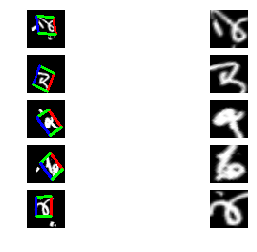

In [298]:
import cv2
count=1
for i in xrange(0,5):
    plt.subplot(5, 2, count)
    first_train_img = np.reshape(batch_xs[i], (40, 40)).copy()
    first_train_img = cv2.cvtColor(first_train_img,cv2.COLOR_GRAY2RGB)
    fourangle=getboundary(theta[i])
    fourangle=fourangle.astype(int)
    #cv2.rectangle(first_train_img, tuple(twoangle[0].tolist()), tuple(twoangle[1].tolist()), (0, 1,0),2)
    cv2.line(first_train_img,tuple(fourangle[0].tolist()),tuple(fourangle[1].tolist()),(1,0,0),2)
    cv2.line(first_train_img,tuple(fourangle[1].tolist()),tuple(fourangle[2].tolist()),(0,1,0),2)
    cv2.line(first_train_img,tuple(fourangle[2].tolist()),tuple(fourangle[3].tolist()),(0,0,1),2)
    cv2.line(first_train_img,tuple(fourangle[3].tolist()),tuple(fourangle[0].tolist()),(0,1,0),2)
    plt.imshow(first_train_img)
    plt.axis('off')
    
    count+=1
    plt.subplot(5, 2, count)
    first_train_img = np.reshape(ROI[i], (40, 40))
    plt.imshow(first_train_img, cmap = plt.get_cmap('gray'))
    plt.axis('off')
    count+=1

plt.show()

# [sec3] give a continus test

[5]


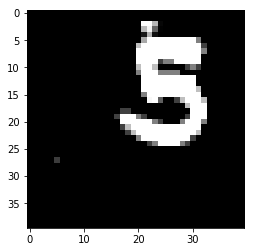

In [299]:
test_idx=13
print y_test[test_idx]
det=getrotation_img(X_test[test_idx, :],0)
plt.imshow(det, cmap = plt.get_cmap('gray'))

In [300]:
# create 720 rotation images
print y_test[test_idx]
for i in xrange(720):
    if i==0:
        X_test_temp=np.reshape(getrotation_img(X_test[test_idx, :],i), (-1, 1600))
    else:
        temp=np.reshape(getrotation_img(X_test[test_idx, :],i), (-1, 1600))
        X_test_temp=np.concatenate((X_test_temp, temp), axis=0)

# forward to test
ROI,theta,prediction = sess.run([h_trans,h_fc_loc2,tf_predictions], feed_dict={
       x: X_test_temp, keep_prob: 1.0})

[5]


In [301]:
(prediction==y_test[test_idx]).mean()

0.99444444444444446

## take a look at images

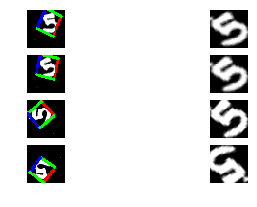

In [302]:
count=1
for i in [15,30,90,180]:
    plt.subplot(5, 2, count)
    first_train_img = np.reshape(X_test_temp[i], (40, 40)).copy()
    first_train_img = cv2.cvtColor(first_train_img,cv2.COLOR_GRAY2RGB)
    fourangle=getboundary(theta[i])
    fourangle=fourangle.astype(int)
    #cv2.rectangle(first_train_img, tuple(twoangle[0].tolist()), tuple(twoangle[1].tolist()), (0, 1,0),2)
    cv2.line(first_train_img,tuple(fourangle[0].tolist()),tuple(fourangle[1].tolist()),(1,0,0),2)
    cv2.line(first_train_img,tuple(fourangle[1].tolist()),tuple(fourangle[2].tolist()),(0,1,0),2)
    cv2.line(first_train_img,tuple(fourangle[2].tolist()),tuple(fourangle[3].tolist()),(0,0,1),2)
    cv2.line(first_train_img,tuple(fourangle[3].tolist()),tuple(fourangle[0].tolist()),(0,1,0),2)
    plt.imshow(first_train_img)
    plt.axis('off')
    
    count+=1
    plt.subplot(5, 2, count)
    first_train_img = np.reshape(ROI[i], (40, 40))
    plt.imshow(first_train_img, cmap = plt.get_cmap('gray'))
    plt.axis('off')
    count+=1


plt.show()

## write the image out

In [303]:
# add retangle to image and write it out
for i in xrange(720):
    first_train_img = np.reshape(X_test_temp[i], (40, 40)).copy()
    first_train_img = cv2.cvtColor(first_train_img,cv2.COLOR_GRAY2RGB)
    fourangle=getboundary(theta[i])
    fourangle=fourangle.astype(int)
    #cv2.rectangle(first_train_img, tuple(twoangle[0].tolist()), tuple(twoangle[1].tolist()), (0, 1,0),2)
    cv2.line(first_train_img,tuple(fourangle[0].tolist()),tuple(fourangle[1].tolist()),(1,0,0),2)
    cv2.line(first_train_img,tuple(fourangle[1].tolist()),tuple(fourangle[2].tolist()),(0,1,0),2)
    cv2.line(first_train_img,tuple(fourangle[2].tolist()),tuple(fourangle[3].tolist()),(0,0,1),2)
    cv2.line(first_train_img,tuple(fourangle[3].tolist()),tuple(fourangle[0].tolist()),(0,1,0),2)
    cv2.imwrite('trial/'+str(i).zfill(4)+'.jpg',first_train_img*255)


## with the help with imagemagick (install it with apt-get) 

### make the pictures to gif
(shell) convert -delay 2 -loop 0 *.jpg myimage.gif

![title](trial/myimage.gif)
